In [32]:
import numpy as np
file=open('E:/royal.txt','r')
royal_data=file.readlines()
file.close()
print(royal_data)

['The future king is the prince\n', 'Daughter is the princess\n', 'Son is the prince\n', 'Only a man can be a king\n', 'Only a woman can be a queen\n', 'The princess will be a queen\n', 'The prince is a strong man\n', 'The princess is a beautiful woman\n', 'Prince is only a boy now\n', 'Prince will be king\n', 'The boy will be man\n', 'A man is King\n', '\n', '\n']


In [17]:
for i in range(len(royal_data)):
    royal_data[i]=royal_data[i].lower().replace('\n','')
print(royal_data)

['the future king is the prince', 'daughter is the princess', 'son is the prince', 'only a man can be a king', 'only a woman can be a queen', 'the princess will be a queen', 'the prince is a strong man', 'the princess is a beautiful woman', 'prince is only a boy now', 'prince will be king', 'the boy will be man', 'a man is king', '', '']


In [20]:
stopwords=['the','is','are','can','will','be','a','only','their','now','and','at','it']
filter_data=[]
for sent in royal_data:
    temp=[]
    for word in sent.split():
        if word not in stopwords:
            temp.append(word)
    filter_data.append(temp)
filter_data
        

[['future', 'king', 'prince'],
 ['daughter', 'princess'],
 ['son', 'prince'],
 ['man', 'king'],
 ['woman', 'queen'],
 ['princess', 'queen'],
 ['prince', 'strong', 'man'],
 ['princess', 'beautiful', 'woman'],
 ['prince', 'boy'],
 ['prince', 'king'],
 ['boy', 'man'],
 ['man', 'king'],
 [],
 []]

In [22]:
bigrams=[]
for word_list in filter_data:
    for i in range(len(word_list)-1):
        for j in range(i+1,len(word_list)):
            bigrams.append([word_list[i],word_list[j]])
            bigrams.append([word_list[j],word_list[i]])
            
            
    
print(bigrams)

[['future', 'king'], ['king', 'future'], ['future', 'prince'], ['prince', 'future'], ['king', 'prince'], ['prince', 'king'], ['daughter', 'princess'], ['princess', 'daughter'], ['son', 'prince'], ['prince', 'son'], ['man', 'king'], ['king', 'man'], ['woman', 'queen'], ['queen', 'woman'], ['princess', 'queen'], ['queen', 'princess'], ['prince', 'strong'], ['strong', 'prince'], ['prince', 'man'], ['man', 'prince'], ['strong', 'man'], ['man', 'strong'], ['princess', 'beautiful'], ['beautiful', 'princess'], ['princess', 'woman'], ['woman', 'princess'], ['beautiful', 'woman'], ['woman', 'beautiful'], ['prince', 'boy'], ['boy', 'prince'], ['prince', 'king'], ['king', 'prince'], ['boy', 'man'], ['man', 'boy'], ['man', 'king'], ['king', 'man']]


In [44]:
all_words=[]
for sent in filter_data:
    all_words.extend(sent)

all_words=list(set(all_words))
all_words.sort()
len(all_words)
all_words

['beautiful',
 'boy',
 'daughter',
 'future',
 'king',
 'man',
 'prince',
 'princess',
 'queen',
 'son',
 'strong',
 'woman']

In [45]:
#one hot encoding
word_dic={}
counter=0
for word in all_words:
    word_dic[word]=counter
    counter+=1
word_dic

{'beautiful': 0,
 'boy': 1,
 'daughter': 2,
 'future': 3,
 'king': 4,
 'man': 5,
 'prince': 6,
 'princess': 7,
 'queen': 8,
 'son': 9,
 'strong': 10,
 'woman': 11}

In [46]:
onehot_data=np.zeros((len(all_words),len(all_words)))
for i in range(len(all_words)):
    onehot_data[i][i]=1
onehot_dic={}
for i in range(len(all_words)):
    onehot_dic[all_words[i]]=onehot_data[i]
for word in onehot_dic:
    print(word,":",onehot_dic[word])

beautiful : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
boy : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
daughter : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
future : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
king : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
man : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
prince : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
princess : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
queen : [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
son : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
strong : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
woman : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [49]:
X=[]
Y=[]
for bi in bigrams:
    X.append(onehot_dic[bi[0]])
    Y.append(onehot_dic[bi[1]])
X=np.array(X)
Y=np.array(Y)

In [65]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input

In [68]:
embed_size = 2

model = Sequential([
    Dense(embed_size, activation='linear'),
    Dense(Y.shape[1], activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

In [69]:
model.fit(X,Y,epochs=1000)

Epoch 1/1000
2/2 [==============================] - 2s 15ms/step - loss: 2.5219
Epoch 2/1000
2/2 [==============================] - 0s 8ms/step - loss: 2.5197
Epoch 3/1000
2/2 [==============================] - 0s 11ms/step - loss: 2.5179
Epoch 4/1000
2/2 [==============================] - 0s 12ms/step - loss: 2.5159
Epoch 5/1000
2/2 [==============================] - 0s 15ms/step - loss: 2.5145
Epoch 6/1000
2/2 [==============================] - 0s 11ms/step - loss: 2.5128
Epoch 7/1000
2/2 [==============================] - 0s 12ms/step - loss: 2.5113
Epoch 8/1000
2/2 [==============================] - 0s 7ms/step - loss: 2.5097
Epoch 9/1000
2/2 [==============================] - 0s 8ms/step - loss: 2.5082
Epoch 10/1000
2/2 [==============================] - 0s 9ms/step - loss: 2.5065
Epoch 11/1000
2/2 [==============================] - 0s 8ms/step - loss: 2.5051
Epoch 12/1000
2/2 [==============================] - 0s 9ms/step - loss: 2.5034
Epoch 13/1000
2/2 [========================

2/2 [==============================] - 0s 4ms/step - loss: 2.4036
Epoch 104/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.4025
Epoch 105/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.4015
Epoch 106/1000
2/2 [==============================] - 0s 5ms/step - loss: 2.4005
Epoch 107/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.3994
Epoch 108/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.3984
Epoch 109/1000
2/2 [==============================] - 0s 4ms/step - loss: 2.3974
Epoch 110/1000
2/2 [==============================] - 0s 4ms/step - loss: 2.3963
Epoch 111/1000
2/2 [==============================] - 0s 4ms/step - loss: 2.3953
Epoch 112/1000
2/2 [==============================] - 0s 4ms/step - loss: 2.3943
Epoch 113/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.3933
Epoch 114/1000
2/2 [==============================] - 0s 4ms/step - loss: 2.3924
Epoch 115/1000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 2.3069
Epoch 205/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.3060
Epoch 206/1000
2/2 [==============================] - 0s 4ms/step - loss: 2.3050
Epoch 207/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.3040
Epoch 208/1000
2/2 [==============================] - 0s 4ms/step - loss: 2.3031
Epoch 209/1000
2/2 [==============================] - 0s 4ms/step - loss: 2.3021
Epoch 210/1000
2/2 [==============================] - 0s 4ms/step - loss: 2.3011
Epoch 211/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.3002
Epoch 212/1000
2/2 [==============================] - 0s 5ms/step - loss: 2.2993
Epoch 213/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.2983
Epoch 214/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.2974
Epoch 215/1000
2/2 [==============================] - 0s 4ms/step - loss: 2.2963
Epoch 216/1000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 2.2030
Epoch 306/1000
2/2 [==============================] - 0s 4ms/step - loss: 2.2019
Epoch 307/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.2008
Epoch 308/1000
2/2 [==============================] - 0s 4ms/step - loss: 2.1998
Epoch 309/1000
2/2 [==============================] - 0s 4ms/step - loss: 2.1987
Epoch 310/1000
2/2 [==============================] - 0s 4ms/step - loss: 2.1976
Epoch 311/1000
2/2 [==============================] - 0s 4ms/step - loss: 2.1966
Epoch 312/1000
2/2 [==============================] - 0s 4ms/step - loss: 2.1955
Epoch 313/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.1945
Epoch 314/1000
2/2 [==============================] - 0s 4ms/step - loss: 2.1935
Epoch 315/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.1925
Epoch 316/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.1915
Epoch 317/1000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 2.0970
Epoch 407/1000
2/2 [==============================] - 0s 2ms/step - loss: 2.0960
Epoch 408/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.0949
Epoch 409/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.0939
Epoch 410/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.0929
Epoch 411/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.0919
Epoch 412/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.0908
Epoch 413/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.0898
Epoch 414/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.0887
Epoch 415/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.0876
Epoch 416/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.0865
Epoch 417/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.0855
Epoch 418/1000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 1.9940
Epoch 508/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.9930
Epoch 509/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.9922
Epoch 510/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.9911
Epoch 511/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.9901
Epoch 512/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.9892
Epoch 513/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.9882
Epoch 514/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.9872
Epoch 515/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.9862
Epoch 516/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.9852
Epoch 517/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.9841
Epoch 518/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.9832
Epoch 519/1000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 1.8971
Epoch 609/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.8962
Epoch 610/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.8953
Epoch 611/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.8943
Epoch 612/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.8934
Epoch 613/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.8924
Epoch 614/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.8914
Epoch 615/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.8904
Epoch 616/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.8894
Epoch 617/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.8885
Epoch 618/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.8876
Epoch 619/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.8867
Epoch 620/1000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 1.8093
Epoch 710/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.8086
Epoch 711/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.8078
Epoch 712/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.8070
Epoch 713/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.8062
Epoch 714/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.8054
Epoch 715/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.8046
Epoch 716/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.8037
Epoch 717/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.8029
Epoch 718/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.8021
Epoch 719/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.8013
Epoch 720/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.8006
Epoch 721/1000
2/2 [=======================

2/2 [==============================] - 0s 4ms/step - loss: 1.7324
Epoch 811/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.7317
Epoch 812/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.7310
Epoch 813/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.7303
Epoch 814/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.7295
Epoch 815/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.7288
Epoch 816/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.7281
Epoch 817/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.7273
Epoch 818/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.7266
Epoch 819/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.7259
Epoch 820/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.7251
Epoch 821/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.7242
Epoch 822/1000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 1.6624
Epoch 912/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.6618
Epoch 913/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.6611
Epoch 914/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.6605
Epoch 915/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.6598
Epoch 916/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.6592
Epoch 917/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.6585
Epoch 918/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.6579
Epoch 919/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.6573
Epoch 920/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.6567
Epoch 921/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.6560
Epoch 922/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.6554
Epoch 923/1000
2/2 [=======================

In [74]:
wights=model.get_weights()[0]

In [75]:
word_embedding={}
for word in all_words:
    word_embedding[word]=wights[word_dic[word]]
word_embedding

{'beautiful': array([-0.5932351,  0.685636 ], dtype=float32),
 'boy': array([ 0.38029796, -1.7867635 ], dtype=float32),
 'daughter': array([-0.1597844,  0.9725045], dtype=float32),
 'future': array([-0.5043892 , -0.13777635], dtype=float32),
 'king': array([ 0.6791104, -1.6128471], dtype=float32),
 'man': array([-1.2689881, -0.5322624], dtype=float32),
 'prince': array([-0.37999365, -0.24695405], dtype=float32),
 'princess': array([0.98411626, 1.2243555 ], dtype=float32),
 'queen': array([-0.26835477,  1.0601829 ], dtype=float32),
 'son': array([-0.7593151, -1.480184 ], dtype=float32),
 'strong': array([ 0.48480833, -0.744539  ], dtype=float32),
 'woman': array([0.63835895, 1.2120225 ], dtype=float32)}

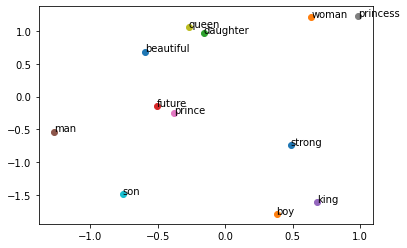

In [79]:
import matplotlib.pyplot as plt

for word in all_words:
    coordinates=word_embedding[word]
    plt.scatter(coordinates[0],coordinates[1])
    plt.annotate(word,(coordinates[0],coordinates[1]))
plt.show()